In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")


In [2]:
#cargar dataset
df=pd.read_csv("data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Convertir date_added a datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extraer año y mes 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Llenado de valores nulos en country con "Unknown"
df['country'] = df['country'].fillna('Unknown')


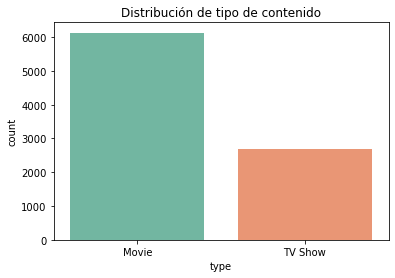

In [7]:
# Tipo de contenido
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribución de tipo de contenido")
plt.show()


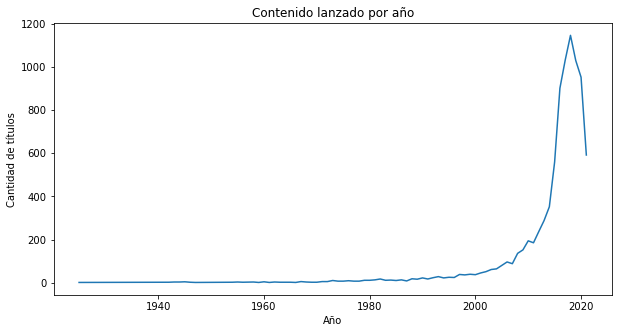

In [8]:
#evolución por año
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title("Contenido lanzado por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.show()

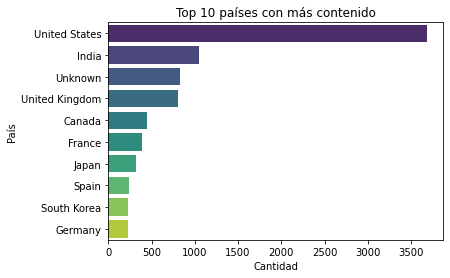

In [9]:
# Top 10 paises con mas contenido

from collections import Counter

# Dividir países si hay varios por fila
countries = df['country'].dropna().str.split(', ')
country_counts = Counter([country for sublist in countries for country in sublist])

top_countries = pd.DataFrame(country_counts.most_common(10), columns=['País', 'Cantidad'])

sns.barplot(data=top_countries, x='Cantidad', y='País', palette='viridis')
plt.title("Top 10 países con más contenido")
plt.show()


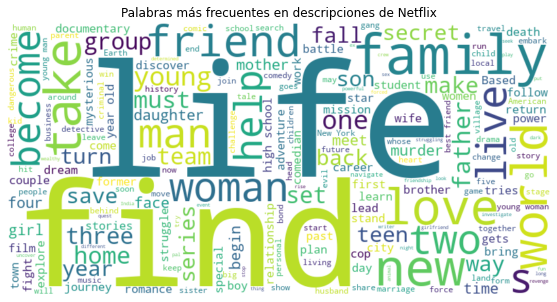

In [10]:
#WordCloud de descripciones
text = " ".join(df['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palabras más frecuentes en descripciones de Netflix")
plt.show()
